<a href="https://colab.research.google.com/github/lbenipayo/MLAssignment/blob/main/MyLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#Import required modules
import numpy as np

#Defining MyLinearRegression class
class MyLinearRegression:
  def __init__(self, x , y, z):
    self.data = x
    self.label = y
    self.test = z
    self.m = 0
    self.b = 0
    self.n = len(x)
      
  def fit(self , epochs , lr):
      
    #Implementing Gradient Descent
    for i in range(epochs):
      y_pred = self.m * self.data + self.b
      
      #Calculating derivatives w.r.t Parameters
      D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
      D_b = (-1/self.n)*sum(self.label-y_pred)
      
      #Updating Parameters
      self.m = self.m - lr * D_m
      self.b = self.b - lr * D_b
    
    self.plot_results(self.data, self.label, self.test, self.predict(self.test))
          
  def predict(self , inp):
    y_pred = self.m * inp + self.b 
    return y_pred

  def plot_results(self, x_scatter, y_scatter, x_line, y_line):
    plt.figure(figsize = (10,6))
    plt.scatter(x_scatter, y_scatter , color = 'green')
    plt.plot(x_line, y_line , color = 'k' , lw = 3)
    plt.title( 'Project Duration', size = 20 )
    plt.xlabel('Site Installs' , size = 20)
    plt.ylabel('Days', size = 20)
    plt.show()

  

In [113]:
#importing required modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import requests
import io

#Defining my data loading class
class MyDataLoad:
  def __init__(self):
    
    # Downloading the my csv file from your GitHub account
    url = "https://raw.githubusercontent.com/lbenipayo/MLAssignment/main/duration.csv" 
    download = requests.get(url).content

    # Reading the downloaded content and turning it into a pandas dataframe
    self.df = pd.read_csv(io.StringIO(download.decode('utf-8')))

    #Preparing the data
    self.x = np.array(self.df.iloc[:,0])
    self.y = np.array(self.df.iloc[:,1])

    # Splitting dataset into train and test set  
    self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.x, self.y, test_size = .2, random_state = 0 )

    #Creating the MyLinearRegression class object
    regressor = MyLinearRegression(self.X_train, self.Y_train, self.X_test)

    #Training the model with .fit method
    regressor.fit(1000000 , 0.0001) # epochs-1000000 , learning_rate - 0.0001 which could produce mean squared error very very close to sklearn linear model mean squared error

    self.sklearnCompare()
    
  def sklearnCompare(self):
    Xtrain_shape = self.X_train.reshape(-1, 1)
    Ytrain_shape = self.Y_train.reshape(-1, 1)
    Xtest_shape = self.X_test.reshape(-1, 1)
    lr_model = LinearRegression()
    lr_model.fit(Xtrain_shape, Ytrain_shape)
    lr_pred = lr_model.predict(Xtest_shape)
    
    print("Mean Squared Error based on my own Linear Regression Model is", mean_squared_error(self.Y_test, regressor.predict(self.X_test)))
    print("Mean Squared Error based on sklearn Linear Regression Model is", mean_squared_error(self.Y_test, lr_pred))

  def both_predict(self, site_input):
    duration_pred = regressor.predict(site_input)
    print("According to my own Linear Model, it will take", round(duration_pred), "days or", round(duration_pred/30,2), "months to complete a project with", site_input, "sites.")
    sites = [[site_input]]
    sklearn_pred = lr_model.predict(sites)
    print("According to sklearn Linear Model, it will take", np.round(sklearn_pred), "days or", np.round(sklearn_pred/30, decimals=2), "months to complete a project with", site_input, "sites.")

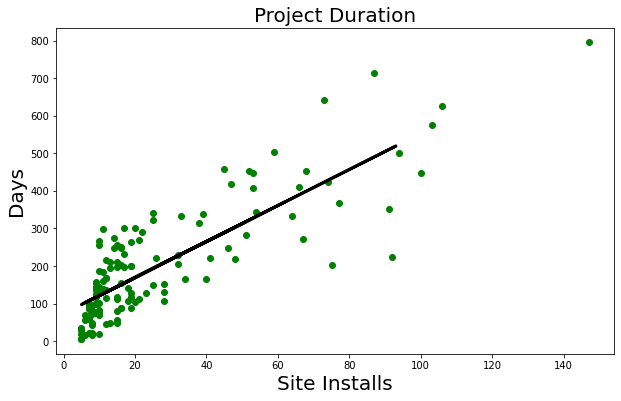

Mean Squared Error based on my own Linear Regression Model is 7232.769349964058
Mean Squared Error based on sklearn Linear Regression Model is 7232.769349963089


In [114]:
output = MyDataLoad()
output

In [116]:
output.both_predict(62)

According to my own Linear Model, it will take 371 days or 12.36 months to complete a project with 62 sites.
According to sklearn Linear Model, it will take [[371.]] days or [[12.36]] months to complete a project with 62 sites.
